# 멀티 모달 : 이미지 분석하기

In [10]:
from dotenv import load_dotenv
import os

# .env 파일 불러오기
load_dotenv("C:/env/.env")

# 환경 변수 가져오기
API_KEY = os.getenv("OPENAI_API_KEY")

from openai import OpenAI
client = OpenAI(api_key=API_KEY)

### [1] 이미지 입력하기

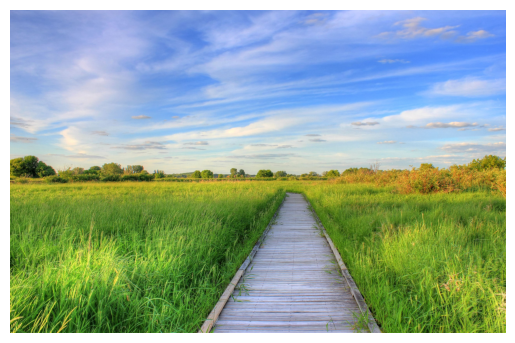

In [14]:
# !pip install Pillow
# !pip install "numpy<2"

import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg"

# User-Agent 추가 (일부 서버는 필요)
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)

# 이미지 열기
img = Image.open(BytesIO(response.content))

plt.imshow(img)
plt.axis("off")
plt.show()

In [16]:
# 이미지 입력 질의
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages = [
        {
            "role":"user",
            "content":[
                {"type":"text","text": "이 이미지에 무엇이 있나요?"},
                {
                  "type":"image_url",
                  "image_url": {
                      "url": "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg"
                  },  
                },
            ],
        }
    ],
    max_tokens =300,
)

print(response.choices[0].message.content)

이미지에는 초록색 풀밭과 나무가 있는 평화로운 자연 풍경이 보입니다. 중앙에는 나무로 만들어진 길이 뻗어 있으며, 푸른 하늘과 구름이 보입니다. 전체적으로 고요하고 아름다운 자연 환경을 담고 있는 것 같습니다.


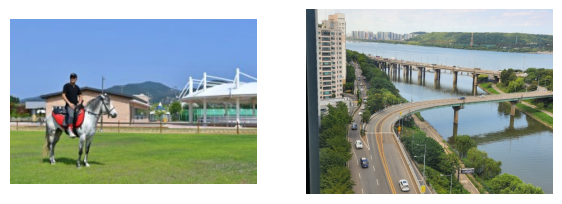

In [17]:
from PIL import Image
import matplotlib.pyplot as plt

# 로컬 경로에 있는 이미지를 불러옵니다.
image_path1 = 'horse.jpg'
image_path2 = 'river.jpg'

# 이미지를 열어줍니다.
img1 = Image.open(image_path1)
img2 = Image.open(image_path2)


# 이미지를 출력합니다.
fig, axes = plt.subplots(1, 2, figsize=(7, 7))
axes[0].imshow(img1)
axes[0].axis('off')  # 축 제거
axes[1].imshow(img2)
axes[1].axis('off')  # 축 제거
plt.show()

In [20]:
# base64 encoding web service 
# https://vivoldi.com/tools/base64-encoding-decoding
# https://www.base64encode.net/base64-image-encoder

In [ ]:
import base64